# Data Augmentation

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset_path = './cropped/'

datagen = ImageDataGenerator(
    rescale=1./255,               
    rotation_range=20,            
    width_shift_range=0.2,        
    height_shift_range=0.2,       
    zoom_range=0.2,               
    horizontal_flip=True,         
    validation_split=0.2          
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),      
    batch_size=8,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=8,
    class_mode='categorical',
    subset='validation'
)

Found 133 images belonging to 5 classes.
Found 30 images belonging to 5 classes.


# Model Building Using Transfer Learning

In [4]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)      
x = Dropout(0.3)(x)                  
x = Dense(128, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', save_best_only=True)
]

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=callbacks
)

C:\Users\asus\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.0857 - loss: 2.1948

17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 274ms/step - accuracy: 0.0876 - loss: 2.1905 - val_accuracy: 0.2000 - val_loss: 1.7167
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.1748 - loss: 1.8701

17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 179ms/step - accuracy: 0.1785 - loss: 1.8625 - val_accuracy: 0.4000 - val_loss: 1.5394
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.2312 - loss: 1.7417

17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 187ms/step - accuracy: 0.2367 - loss: 1.7365 - val_accuracy: 0.4667 - val_loss: 1.4061
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.4844 - loss: 1.2564

17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 189ms/step - accuracy: 0.4855 - loss: 1.2569 - val_accuracy: 0.4667 - val_loss: 1.3411
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.4092 - loss: 1.4969

17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 198ms/step - accuracy: 0.4094 - loss: 1.4945 - val_accuracy: 0.5333 - val_loss: 1.2726
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - accuracy: 0.3727 - loss: 1.3291 - val_accuracy: 0.5333 - val_loss: 1.3261
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.5430 - loss: 1.2027

17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 206ms/step - accuracy: 0.5433 - loss: 1.2016 - val_accuracy: 0.6000 - val_loss: 1.1340
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.5367 - loss: 1.1766

17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 201ms/step - accuracy: 0.5391 - loss: 1.1738 - val_accuracy: 0.6000 - val_loss: 1.0922
Epoch 9/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.7134 - loss: 0.9375

17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 193ms/step - accuracy: 0.7101 - loss: 0.9397 - val_accuracy: 0.7000 - val_loss: 1.0063
Epoch 10/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 183ms/step - accuracy: 0.6177 - loss: 0.9692 - val_accuracy: 0.6667 - val_loss: 1.0351
Epoch 11/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.6825 - loss: 0.9072

17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 191ms/step - accuracy: 0.6830 - loss: 0.9080 - val_accuracy: 0.7333 - val_loss: 0.9413
Epoch 12/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 171ms/step - accuracy: 0.6422 - loss: 0.9603 - val_accuracy: 0.6333 - val_loss: 0.9711
Epoch 13/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.7138 - loss: 0.8352

17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 199ms/step - accuracy: 0.7130 - loss: 0.8344 - val_accuracy: 0.7667 - val_loss: 0.8158
Epoch 14/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 189ms/step - accuracy: 0.7810 - loss: 0.7483 - val_accuracy: 0.7333 - val_loss: 0.8348
Epoch 15/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 172ms/step - accuracy: 0.7674 - loss: 0.8095 - val_accuracy: 0.7333 - val_loss: 0.8614
Epoch 16/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 0.8316 - loss: 0.6109

17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 201ms/step - accuracy: 0.8289 - loss: 0.6147 - val_accuracy: 0.6000 - val_loss: 0.8139
Epoch 17/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 171ms/step - accuracy: 0.8001 - loss: 0.6193 - val_accuracy: 0.6333 - val_loss: 0.8583
Epoch 18/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.7598 - loss: 0.5718

17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 189ms/step - accuracy: 0.7619 - loss: 0.5712 - val_accuracy: 0.8000 - val_loss: 0.6691
Epoch 19/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step - accuracy: 0.7838 - loss: 0.6833 - val_accuracy: 0.6667 - val_loss: 0.8737
Epoch 20/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step - accuracy: 0.8231 - loss: 0.5812 - val_accuracy: 0.6000 - val_loss: 0.8685


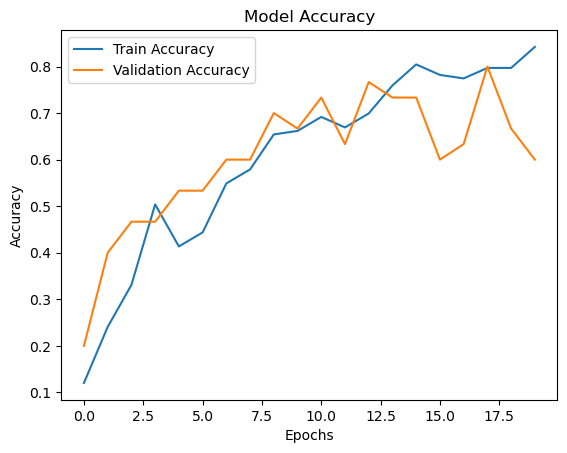

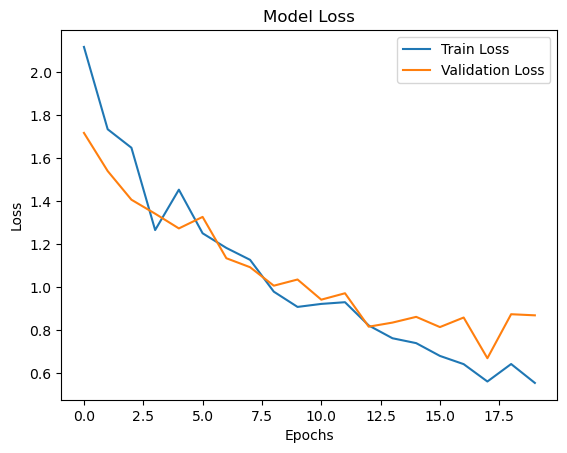

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Creating a function to check if the predcitons are right 

In [7]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
import os

model = load_model('best_model.h5') 

class_labels = os.listdir('./cropped/')
class_labels.sort() 

face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')

def get_roi_from_image(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        roi = img[y:y+h, x:x+w]
        return roi
    return None

def predict_image(img_path):
    roi = get_roi_from_image(img_path)
    if roi is None:
        print("No face detected.")
        return

    img_resized = cv2.resize(roi, (224, 224))
    img_array = img_to_array(img_resized)
    img_array = img_array / 255.0  
    img_array = np.expand_dims(img_array, axis=0)  

    predictions = model.predict(img_array)[0]
    top_idx = np.argmax(predictions)
    predicted_class = class_labels[top_idx]
    confidence = predictions[top_idx] * 100

    print(f"Predicted: {predicted_class} ({confidence:.2f}%)")

    plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
    plt.title(f"{predicted_class} ({confidence:.2f}%)")
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 923ms/step
Predicted: virat_kohli (84.00%)


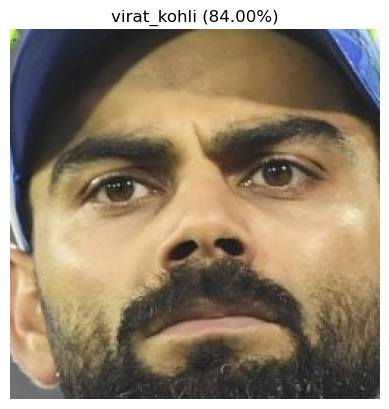

In [8]:
predict_image('C:/Users/asus/Desktop/DS!ML/Image Classification/images_dataset/virat_kohli/84b8ff940f.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted: lionel_messi (59.07%)


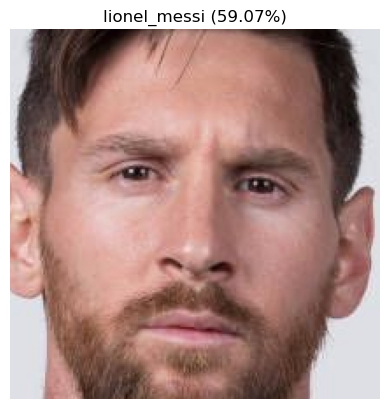

In [9]:
predict_image('C:/Users/asus/Desktop/DS!ML/Image Classification/images_dataset/lionel_messi/8e28dca199d2c529e710f2fc7550fc85.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted: maria_sharapova (67.18%)


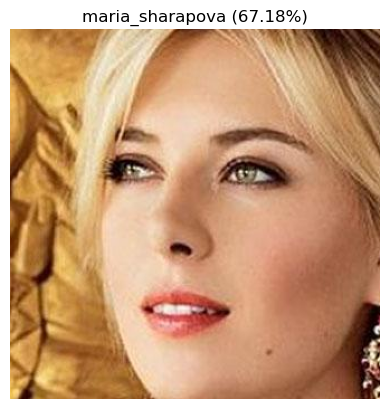

In [10]:
predict_image('C:/Users/asus/Desktop/DS!ML/Image Classification/images_dataset/maria_sharapova/184-1847379_download-maria-sharapova-wallpaper-2013-wallpaper-hd-full.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted: roger_federer (95.35%)


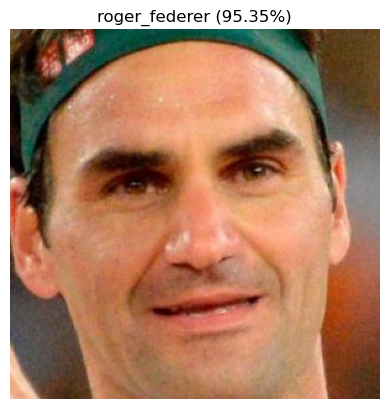

In [11]:
predict_image('C:/Users/asus/Desktop/DS!ML/Image Classification/images_dataset/roger_federer/NINTCHDBPICT000561000009-e1582196702724-1-1600x1412.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted: serena_williams (64.18%)


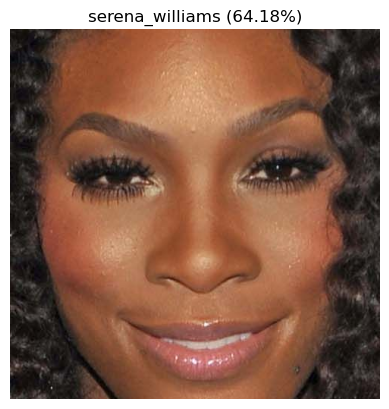

In [12]:
predict_image('C:/Users/asus/Desktop/DS!ML/Image Classification/images_dataset/serena_williams/0ae47ed53dc47509d3f1d68b5a36a0c2.jpg')